# Modeling and Simulating Ducks in Python

Dieter Brehm's implementation of a duck model

In [4]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *
import numpy as np

In [3]:
system = System (
density_duck = 0.3, # g / cm^3
density_water = 1, # g / cm^3
r = 5, # cm
)

,values
density_duck,0.3
density_water,1.0
r,5.0


In [63]:


def error_func(d, system):
    volume_duck = 4 / 3 * np.pi * (system.r**3)
    mass_duck = volume_duck * system.density_duck
    volume_water = (np.pi / 3) * (3 * system.r * d**2 - d**3)
    mass_water = system.density_water * volume_water
    
    #print("try with d value", d)
    return mass_duck - mass_water

In [64]:
error_func(0.65, system)

150.73060482627858

In [65]:
res = fsolve(error_func, 3, system)

array([3.63257491])

In [72]:
def sweep_duck_density():
    sweep = SweepSeries()
    for density in linspace(0, 1, 100):
        system[0] = density
        res = fsolve(error_func, 3, system)
        sweep[density] = res[0]
    return sweep

In [73]:
results = sweep_duck_density()

C:\Miniconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The number of calls to function has reached maxfev = 400.
  warnings.warn(msg, RuntimeWarning)


,values
0.000000,1.334288e-83
0.010101,5.920610e-01
0.020202,8.447408e-01
0.030303,1.041872e+00
0.040404,1.210379e+00
0.050505,1.360680e+00
0.060606,1.498117e+00
0.070707,1.625861e+00
0.080808,1.745977e+00
0.090909,1.859899e+00


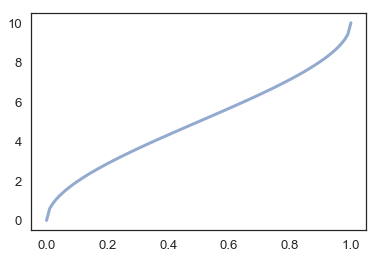

In [74]:
plot(results)